Iteration 1/40, Error: 92162.09084944334
Iteration 2/40, Error: 89805.80284207438
Iteration 3/40, Error: 85913.49670078176
Iteration 4/40, Error: 81892.87309189752
Iteration 5/40, Error: 78174.07923094195
Iteration 6/40, Error: 74815.60543157811
Iteration 7/40, Error: 71958.43217630671
Iteration 8/40, Error: 69600.71774391869
Iteration 9/40, Error: 67678.33555933232
Iteration 10/40, Error: 66117.82661244264
Iteration 11/40, Error: 64851.32840476329
Iteration 12/40, Error: 63820.54833256611
Iteration 13/40, Error: 62977.28627706346
Iteration 14/40, Error: 62282.62291819785
Iteration 15/40, Error: 61705.65708522049
Iteration 16/40, Error: 61222.14809661254
Iteration 17/40, Error: 60813.21940931829
Iteration 18/40, Error: 60464.21229063758
Iteration 19/40, Error: 60163.73092377249
Iteration 20/40, Error: 59902.88064348847
Iteration 21/40, Error: 59674.67718611557
Iteration 22/40, Error: 59473.59621326109
Iteration 23/40, Error: 59295.23288121844
Iteration 24/40, Error: 59136.04555509487
I

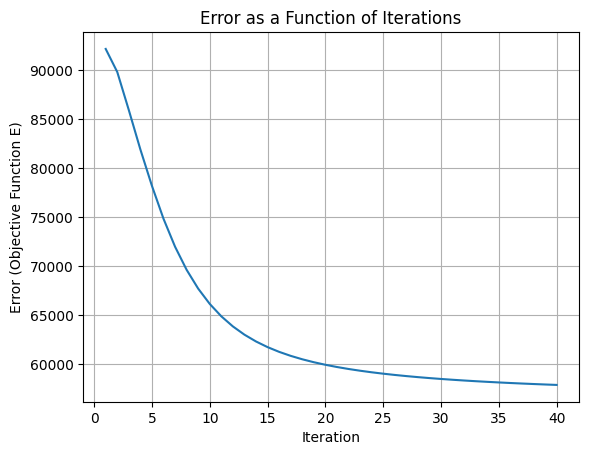

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
k = 20
lambda_reg = 0.1
eta = 0.05  # Initial learning rate
num_iterations = 40

# File paths
train_file = 'ratings.train.txt'

# Initialize P and Q with random values in [0, sqrt(5/k)]
def initialize_matrices(num_users, num_items, k):
    init_bound = np.sqrt(5 / k)
    P = np.random.uniform(0, init_bound, (num_users, k))
    Q = np.random.uniform(0, init_bound, (num_items, k))
    return P, Q

# Compute the error function E
def compute_error(file_path, P, Q, lambda_reg):
    error = 0
    reg_term = 0
    with open(file_path, 'r') as f:
        for line in f:
            user, item, rating = map(int, line.strip().split())
            prediction = np.dot(Q[item], P[user].T)
            error += (rating - prediction) ** 2

    reg_term = lambda_reg * (np.sum(np.linalg.norm(P, axis=1) ** 2) + np.sum(np.linalg.norm(Q, axis=1) ** 2))
    return error + reg_term

# Stochastic Gradient Descent for Latent Factor Model
def stochastic_gradient_descent(train_file, num_users, num_items, k, lambda_reg, eta, num_iterations):
    P, Q = initialize_matrices(num_users, num_items, k)
    errors = []

    for iteration in range(num_iterations):
        with open(train_file, 'r') as f:
            for line in f:
                user, item, rating = map(int, line.strip().split())
                # Calculate prediction and error
                prediction = np.dot(Q[item], P[user].T)
                error_iu = rating - prediction
                # Update qi and pu
                q_i_old = Q[item].copy()
                p_u_old = P[user].copy()
                Q[item] += eta * (error_iu * p_u_old - lambda_reg * q_i_old)
                P[user] += eta * (error_iu * q_i_old - lambda_reg * p_u_old)
        # Compute error E after each iteration
        E = compute_error(train_file, P, Q, lambda_reg)
        errors.append(E)
        print(f'Iteration {iteration + 1}/{num_iterations}, Error: {E}')

    return P, Q, errors

# Determine the number of users and items in the dataset
def get_num_users_items(file_path):
    num_users = 0
    num_items = 0
    with open(file_path, 'r') as f:
        for line in f:
            user, item, _ = map(int, line.strip().split())
            num_users = max(num_users, user + 1)
            num_items = max(num_items, item + 1)
    return num_users, num_items

def main():
    # Get number of users and items from the training file
    num_users, num_items = get_num_users_items(train_file)

    # Train the model using SGD
    P, Q, errors = stochastic_gradient_descent(train_file, num_users, num_items, k, lambda_reg, eta, num_iterations)

    # Plot the value of the objective function E over iterations
    plt.plot(range(1, num_iterations + 1), errors)
    plt.xlabel('Iteration')
    plt.ylabel('Error (Objective Function E)')
    plt.title('Error as a Function of Iterations')
    plt.grid()
    plt.show()

if __name__ == '__main__':
    main()
